### Unemployment Analysis in India

In [18]:
# Importing libraries and loading data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading the dataset
df = pd.read_csv("Unemployment in India.csv")

In [19]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [21]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


### Data cleaning and basic stats

In [22]:
# renaming columns to simpler names
df = df.rename(columns={
    "Region": "State",
    " Date": "Date",
    " Frequency": "Frequency",
    " Estimated Unemployment Rate (%)": "UnemploymentRate",
    " Estimated Employed": "Employed",
    " Estimated Labour Participation Rate (%)": "LabourParticipationRate",
    "Area": "Area"
})

print(df.describe())

# unique states and areas
print("Number of states:", df["State"].nunique())
print("Areas:", df["Area"].unique())

       UnemploymentRate      Employed  LabourParticipationRate
count        740.000000  7.400000e+02               740.000000
mean          11.787946  7.204460e+06                42.630122
std           10.721298  8.087988e+06                 8.111094
min            0.000000  4.942000e+04                13.330000
25%            4.657500  1.190404e+06                38.062500
50%            8.350000  4.744178e+06                41.160000
75%           15.887500  1.127549e+07                45.505000
max           76.740000  4.577751e+07                72.570000
Number of states: 28
Areas: ['Rural' nan 'Urban']


### Unemployment rate by state

State
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: UnemploymentRate, dtype: float64


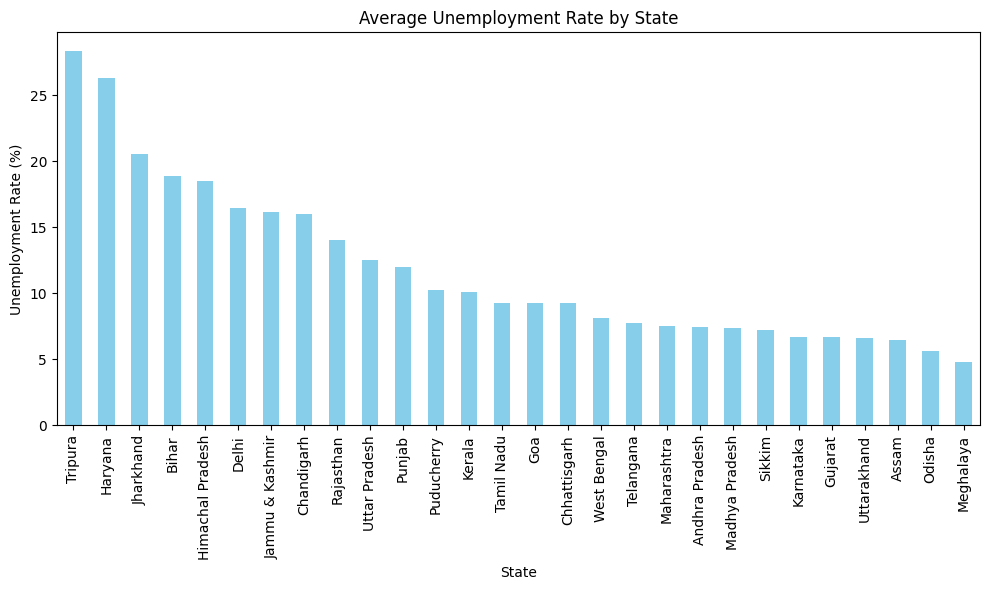

In [23]:
# average unemployment rate for each state
state_unemp = df.groupby("State")["UnemploymentRate"].mean().sort_values(ascending=False)
print(state_unemp)

plt.figure(figsize=(10,6))
state_unemp.plot(kind="bar", color="skyblue")
plt.title("Average Unemployment Rate by State")
plt.xlabel("State")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Trend over time 

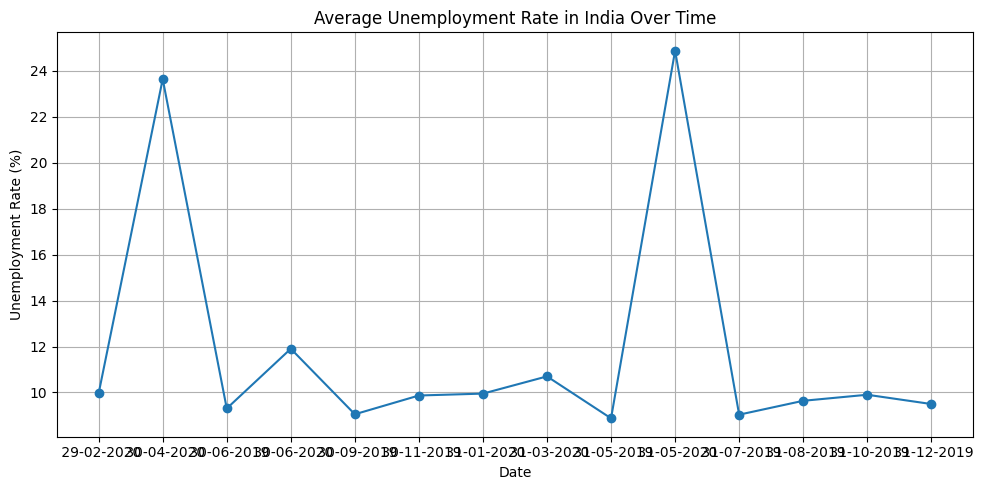

In [24]:
# overall average unemployment over time
time_unemp = df.groupby("Date")["UnemploymentRate"].mean()

plt.figure(figsize=(10,5))
plt.plot(time_unemp.index, time_unemp.values, marker="o")
plt.title("Average Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

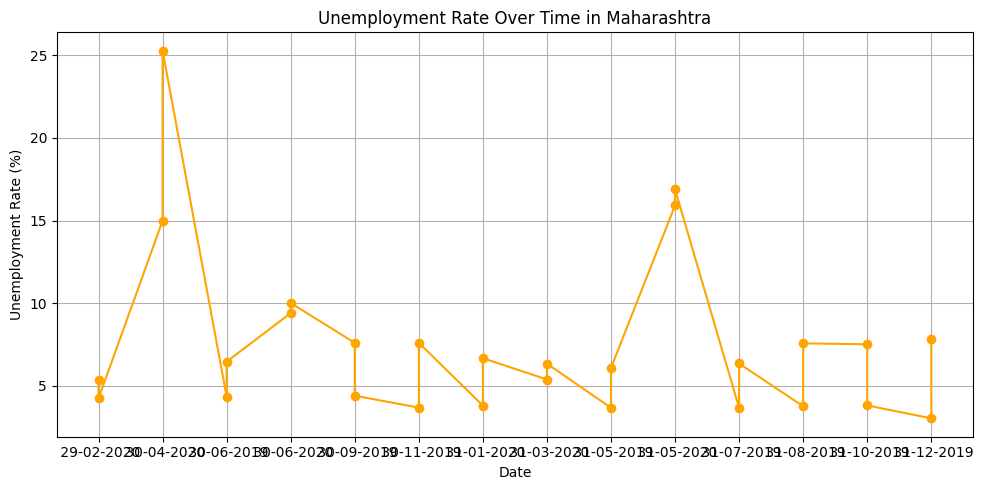

In [25]:
# for example state - Maharashtra
state_name = "Maharashtra" 
bihar = df[df["State"] == state_name].sort_values("Date")

plt.figure(figsize=(10,5))
plt.plot(bihar["Date"], bihar["UnemploymentRate"], marker="o", color="orange")
plt.title(f"Unemployment Rate Over Time in {state_name}")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Rural vs Urban comparison

Area
Rural    10.324791
Urban    13.166614
Name: UnemploymentRate, dtype: float64


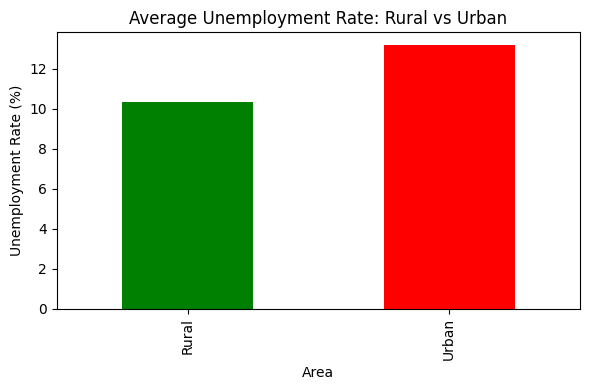

In [26]:
# average unemployment by area type
area_unemp = df.groupby("Area")["UnemploymentRate"].mean()
print(area_unemp)

plt.figure(figsize=(6,4))
area_unemp.plot(kind="bar", color=["green", "red"])
plt.title("Average Unemployment Rate: Rural vs Urban")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

### Relationship between unemployment and labour participation

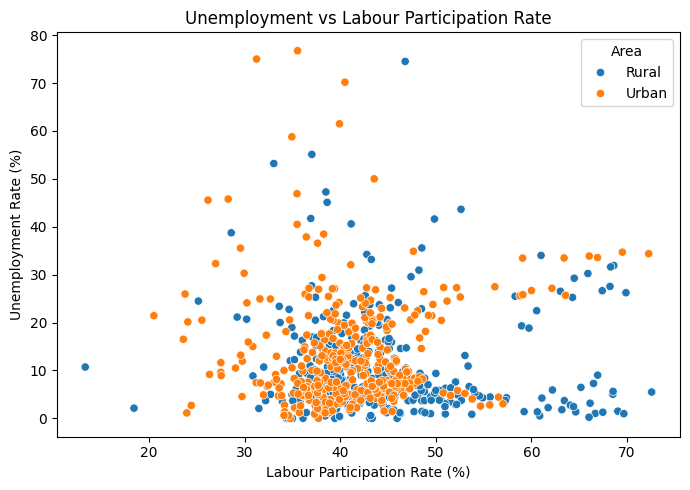

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="LabourParticipationRate", y="UnemploymentRate", hue="Area")
plt.title("Unemployment vs Labour Participation Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()